<a href="https://colab.research.google.com/github/vivek2002-deb/Mini-Project/blob/main/Forecasting_by_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [63]:
df = pd.read_csv(r'/content/sample_data/owid-covid-data.csv' , header=0 , parse_dates=[3])

In [64]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


<Figure size 576x576 with 0 Axes>

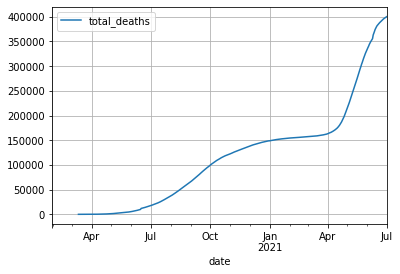

In [65]:
## plot for INDIA

plt.figure(figsize=(8,8))
df.set_index('date').query("location=='India'")[['total_deaths']].plot()
plt.grid()
plt.show()

<Figure size 576x576 with 0 Axes>

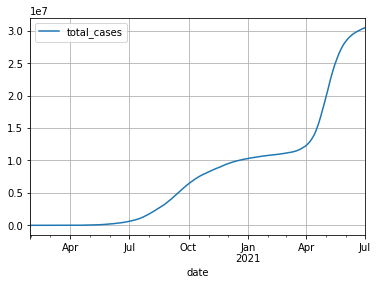

In [66]:
plt.figure(figsize=(8,8))
df.set_index('date').query("location=='India'")[['total_cases']].plot()
plt.grid()
plt.show()

<Figure size 576x576 with 0 Axes>

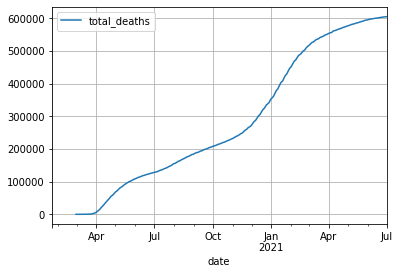

In [67]:
## plot for USA

plt.figure(figsize=(8,8))
df.set_index('date').query("location=='United States'")[['total_deaths']].plot()
plt.grid()
plt.show()

<Figure size 576x576 with 0 Axes>

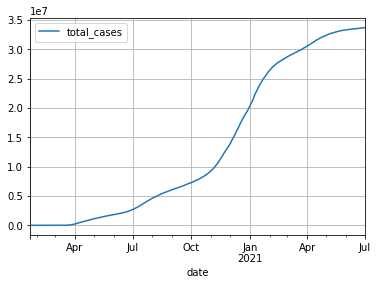

In [68]:
plt.figure(figsize=(8,8))
df.set_index('date').query("location=='United States'")[['total_cases']].plot()
plt.grid()
plt.show()

In [69]:
## MODEL of deaths for INDIA

In [70]:
df_death_INDIA = df.query("location=='India'")[['date','total_deaths']].rename({'date':'ds' , 'total_deaths':'y'} , axis=1)

In [71]:
df_death_INDIA.isnull().sum()

ds     0
y     41
dtype: int64

In [72]:
df_death_INDIA['y'] = df_death_INDIA['y'].fillna(0)

In [73]:
model = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model.fit(df_death_INDIA)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
future = model.make_future_dataframe(periods=30)

In [75]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,40.078707,-1322.007334,1507.604743
1,2020-01-31,50.782335,-1449.756817,1412.356487
2,2020-02-01,36.085059,-1322.444243,1364.251201
3,2020-02-02,1.916876,-1417.135989,1330.028652
4,2020-02-03,-58.800868,-1364.938751,1271.099420
...,...,...,...,...
544,2021-07-27,422388.990683,404090.734098,443054.864507
545,2021-07-28,423251.237603,403760.187471,444917.298749
546,2021-07-29,424157.105303,403810.505779,446768.395469
547,2021-07-30,425029.405126,402932.224952,448596.734749


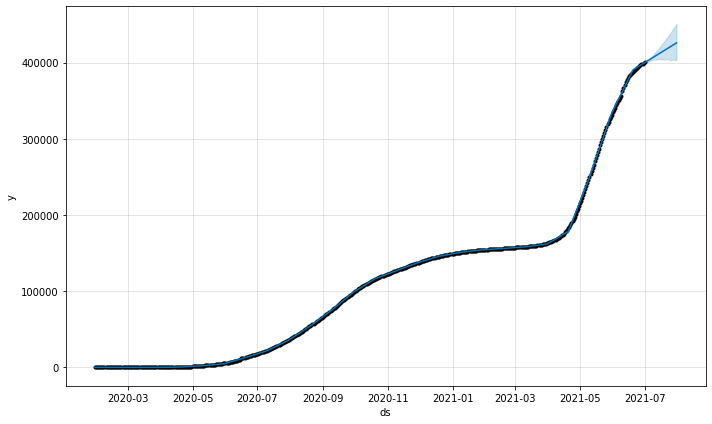

In [76]:
model.plot(forecast);

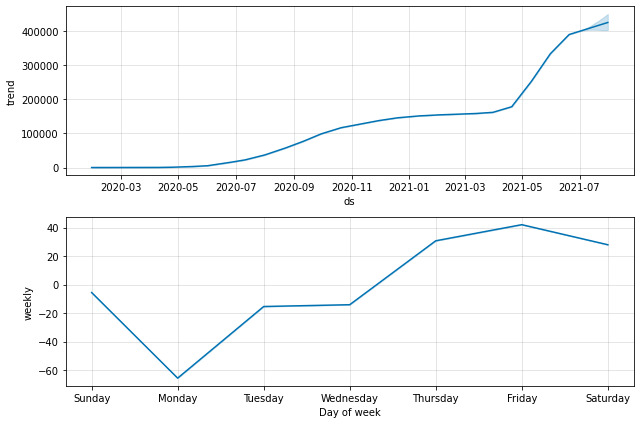

In [77]:
model.plot_components(forecast);

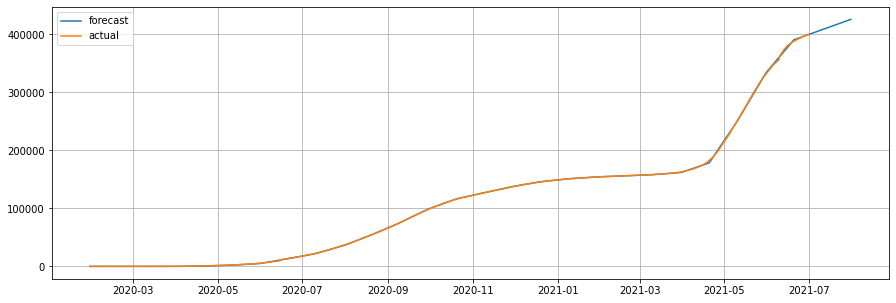

In [78]:
plt.figure(figsize=(15,5))
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(df_death_INDIA['ds'],df_death_INDIA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

In [79]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='150 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-03 00:00:00 and 2021-02-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
131,146 days,2.343698e+10,153091.424334,118245.376820,0.336139,0.360944,0.5
132,147 days,2.371167e+10,153985.943181,118034.572268,0.331420,0.359933,0.5
133,148 days,2.396130e+10,154794.385785,117679.506001,0.326301,0.358184,0.5
134,149 days,2.419310e+10,155541.322449,117397.622903,0.321767,0.355799,0.5
135,150 days,2.440811e+10,156230.947069,117199.156252,0.317854,0.352605,0.5


In [80]:
## Model of cases for INDIA

In [81]:
df_cases_INDIA = df.query("location=='India'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)

In [82]:
df_cases_INDIA.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
df_cases_INDIA['y'] = df_cases_INDIA['y'].fillna(0)

In [83]:
model_1 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model_1.fit(df_cases_INDIA)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
future_1 = model_1.make_future_dataframe(periods=30)

In [85]:
forecast_1 = model_1.predict(future)
forecast_1[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,1.237565e+03,-1.380885e+05,1.306437e+05
1,2020-01-31,2.271081e+03,-1.295105e+05,1.382003e+05
2,2020-02-01,3.215471e+03,-1.303714e+05,1.372173e+05
3,2020-02-02,1.249535e+03,-1.318402e+05,1.332650e+05
4,2020-02-03,-6.317357e+03,-1.421873e+05,1.398638e+05
...,...,...,...,...
544,2021-07-27,3.165306e+07,2.969393e+07,3.367070e+07
545,2021-07-28,3.170289e+07,2.962419e+07,3.386856e+07
546,2021-07-29,3.175011e+07,2.946477e+07,3.401932e+07
547,2021-07-30,3.179711e+07,2.946649e+07,3.420961e+07


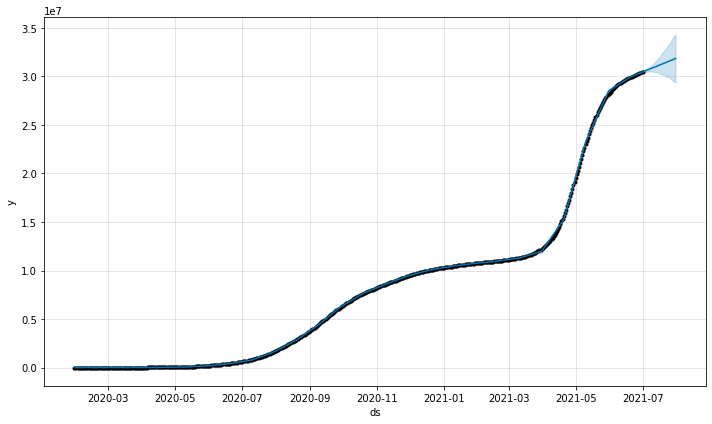

In [86]:
model_1.plot(forecast_1);

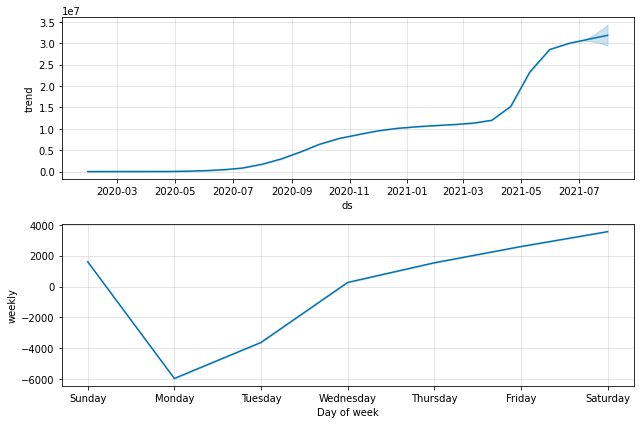

In [87]:
model_1.plot_components(forecast_1);

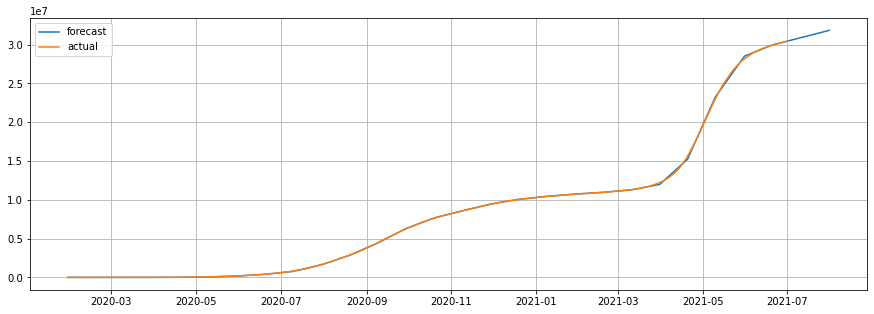

In [89]:
plt.figure(figsize=(15,5))
plt.plot(forecast_1['ds'],forecast_1['yhat'])
plt.plot(df_cases_INDIA['ds'],df_cases_INDIA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

In [90]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_1, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv2 = cross_validation(model_1, cutoffs=cutoffs, horizon='150 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-03 00:00:00 and 2021-02-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
131,146 days,1.527705e+14,1.236004e+07,9.328651e+06,0.327797,0.374215,0.5
132,147 days,1.538774e+14,1.240473e+07,9.443261e+06,0.332590,0.381975,0.5
133,148 days,1.550600e+14,1.245231e+07,9.575244e+06,0.338308,0.389715,0.5
134,149 days,1.563252e+14,1.250301e+07,9.724942e+06,0.344948,0.396968,0.5
135,150 days,1.576673e+14,1.255656e+07,9.892360e+06,0.352510,0.403500,0.5


In [91]:
## Model of deaths for USA

In [93]:
df_death_USA = df.query("location=='United States'")[['date','total_deaths']].rename({'date':'ds' , 'total_deaths':'y'} , axis=1)

In [112]:
df_death_USA

,ds,y
94360,2020-01-22,0.0
94361,2020-01-23,0.0
94362,2020-01-24,0.0
94363,2020-01-25,0.0
94364,2020-01-26,0.0
...,...,...
94882,2021-06-27,603993.0
94883,2021-06-28,604143.0
94884,2021-06-29,604474.0
94885,2021-06-30,604714.0


In [94]:
df_death_USA.isnull().sum()

ds     0
y     38
dtype: int64

In [95]:
df_death_USA['y'] = df_death_USA['y'].fillna(0)

In [116]:
model_2 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.97)
model_2.fit(df_death_USA)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [117]:
future_2 = model_2.make_future_dataframe(periods=30)

In [118]:
forecast_2 = model_2.predict(future_2)
forecast_2[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-26.741429,-1742.888744,1590.026024
1,2020-01-23,194.509722,-1611.576100,1876.472246
2,2020-01-24,338.476226,-1479.289109,2159.276858
3,2020-01-25,258.912819,-1428.748852,2163.518469
4,2020-01-26,-198.168562,-1958.756353,1499.236450
...,...,...,...,...
552,2021-07-27,611327.798816,582403.983365,634652.782017
553,2021-07-28,611910.721022,582547.563364,636169.333959
554,2021-07-29,612389.968394,581281.526297,638011.764821
555,2021-07-30,612791.931121,581286.573881,640593.180427


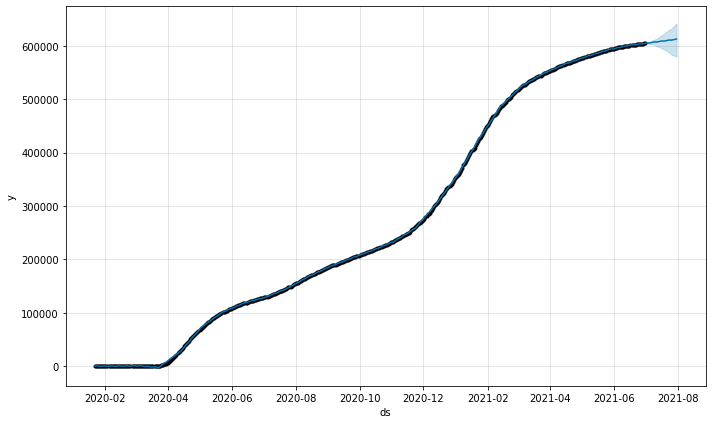

In [120]:
model_2.plot(forecast_2);

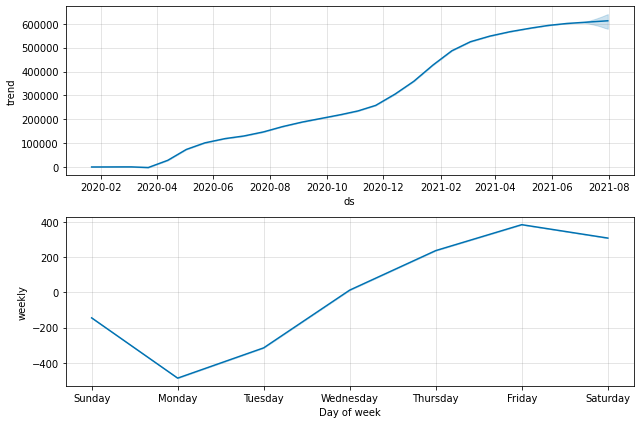

In [122]:
model_2.plot_components(forecast_2);

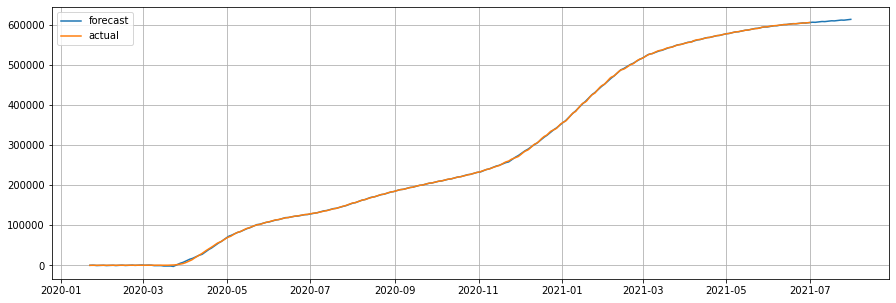

In [123]:
plt.figure(figsize=(15,5))
plt.plot(forecast_2['ds'],forecast_2['yhat'])
plt.plot(df_death_USA['ds'],df_death_USA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

In [131]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_2, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv2 = cross_validation(model_2, cutoffs=cutoffs, horizon='150 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-03 00:00:00 and 2021-02-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
131,146 days,4.328214e+10,208043.604089,167765.235314,0.280775,0.271644,0.5
132,147 days,4.406869e+10,209925.438278,168661.594109,0.282053,0.272789,0.5
133,148 days,4.487319e+10,211832.920613,169570.159782,0.283349,0.274304,0.5
134,149 days,4.569093e+10,213754.367954,170482.413894,0.284653,0.275776,0.5
135,150 days,4.651762e+10,215679.440522,171391.005822,0.285954,0.277230,0.5


In [92]:
## Model of cases in USA

In [101]:
df_cases_USA = df.query("location=='United States'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)

In [102]:
df_cases_USA.isnull().sum()

ds    0
y     0
dtype: int64

In [103]:
df_cases_USA['y'] = df_cases_USA['y'].fillna(0)

In [124]:
model_3 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model_3.fit(df_cases_USA)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [125]:
future_3 = model_3.make_future_dataframe(periods=30)

In [126]:
forecast_3 = model_3.predict(future_3)
forecast_3[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-5.899874e+03,-8.766171e+04,8.107966e+04
1,2020-01-23,1.455072e+03,-9.103291e+04,9.233871e+04
2,2020-01-24,8.736160e+03,-8.458876e+04,9.917363e+04
3,2020-01-25,9.334611e+03,-7.607603e+04,9.602776e+04
4,2020-01-26,-1.919805e+03,-9.401912e+04,8.677958e+04
...,...,...,...,...
552,2021-07-27,3.398778e+07,3.276623e+07,3.499176e+07
553,2021-07-28,3.400339e+07,3.276193e+07,3.507953e+07
554,2021-07-29,3.402283e+07,3.269832e+07,3.516903e+07
555,2021-07-30,3.404219e+07,3.266013e+07,3.524238e+07


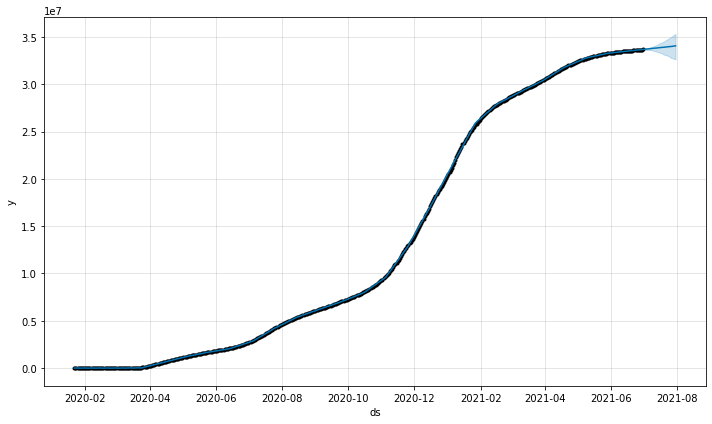

In [127]:
model_3.plot(forecast_3);

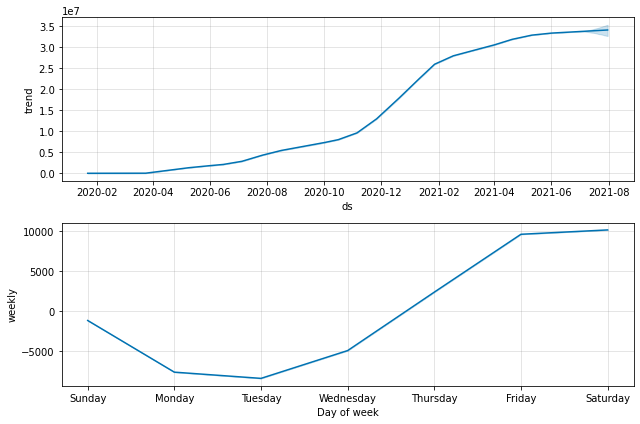

In [128]:
model_3.plot_components(forecast_3);

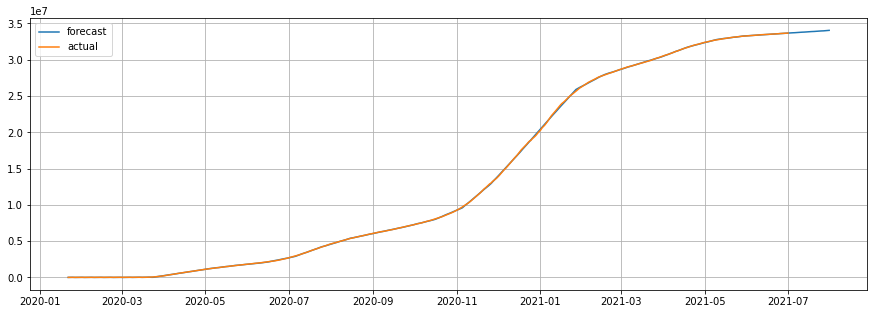

In [129]:
plt.figure(figsize=(15,5))
plt.plot(forecast_3['ds'],forecast_3['yhat'])
plt.plot(df_cases_USA['ds'],df_cases_USA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

In [130]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_3, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv2 = cross_validation(model_3, cutoffs=cutoffs, horizon='150 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-03 00:00:00 and 2021-02-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
131,146 days,7.780514e+13,8.820722e+06,8.415205e+06,0.255396,0.254725,0.700000
132,147 days,7.977157e+13,8.931493e+06,8.529975e+06,0.258679,0.257912,0.666667
133,148 days,8.177649e+13,9.043035e+06,8.645602e+06,0.261984,0.261250,0.633333
134,149 days,8.382245e+13,9.155460e+06,8.762338e+06,0.265323,0.264794,0.600000
135,150 days,8.590309e+13,9.268392e+06,8.879580e+06,0.268675,0.268582,0.566667
